# About Facebook Prophet


Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.


**2. Advantages of Prophet **


Prophet has several advantages associated with it. These are given below:-

1. Accurate and fast - Prophet is accurate and fast. It is used in many applications across Facebook for producing reliable forecasts for planning and goal setting.
2. Fully automatic - Prophet is fully automatic. We will get a reasonable forecast on messy data with no manual effort.
3. Tunable forecasts - Prophet produces adjustable forecasts. It includes many possibilities for users to tweak and adjust forecasts. We can use human-interpretable parameters to improve the forecast by adding our domain knowledge.
4. Available in R or Python - We can implement the Prophet procedure in R or Python.
5. Handles seasonal variations well - Prophet accommodates seasonality with multiple periods.
6. Robust to outliers - It is robust to outliers. It handles outliers by removing them.
7. Robust to missing data - Prophet is resilient to missing data.
3. Installation of Prophet
Table of Contents

We can install Prophet using either command prompt or Anaconda prompt using pip as follows-


In [22]:
!pip install prophet

Installing the yfinance package, which provides financial market data from Yahoo Finance

In [23]:

!pip install yfinance --upgrade --no-cache-dir

# Getting stock data from Yahoo into FB Prophet



In [24]:
# import libraries
import pandas as pd
from prophet import Prophet

from pandas_datareader import data as web
import datetime

import matplotlib.pyplot as plt

import yfinance as yf

from datetime import timedelta



In [25]:
#First Solar, Inc
stock='FSLR'

In [26]:
start = '1900-01-01'

today = pd.to_datetime("today")
yesterday = pd.to_datetime("today") - timedelta(days = 1)
end = yesterday

df = yf.download(stock,
start=start,
end=yesterday,
auto_adjust=True,
actions='inline',
progress=True)

[*********************100%***********************]  1 of 1 completed


In [27]:
# Most historic Stock Prices
df.head()

Price,Close,Dividends,High,Low,Open,Stock Splits,Volume
Ticker,FSLR,FSLR,FSLR,FSLR,FSLR,FSLR,FSLR
Date,,,,,,,
2006-11-17,24.740000,0.0,25.180000,23.500000,24.500000,0.0,18358000
2006-11-20,25.000000,0.0,25.670000,24.290001,24.690001,0.0,1689000
2006-11-21,24.600000,0.0,25.190001,24.309999,25.000000,0.0,1179900
2006-11-22,26.879999,0.0,26.879999,24.500000,24.570000,0.0,1260800
2006-11-24,27.750000,0.0,27.959999,26.879999,27.000000,0.0,350300


In [28]:
# Most recent stock prices
df.tail()


Price,Close,Dividends,High,Low,Open,Stock Splits,Volume
Ticker,FSLR,FSLR,FSLR,FSLR,FSLR,FSLR,FSLR
Date,,,,,,,
2025-03-10,133.110001,0.0,139.740005,132.119995,137.360001,0.0,3449100
2025-03-11,139.100006,0.0,140.949997,135.000000,135.289993,0.0,3780100
2025-03-12,136.039993,0.0,140.979996,134.399994,139.710007,0.0,2134300
2025-03-13,132.809998,0.0,138.809998,131.789993,135.070007,0.0,2100300
2025-03-14,132.509995,0.0,136.020004,131.520004,136.020004,0.0,2111600


View Closing values only

In [29]:
df = df.loc[:, ['Close']]

In [30]:
# Most historic Stock closing Prices
df.head()

Price,Close
Ticker,FSLR
Date,
2006-11-17,24.740000
2006-11-20,25.000000
2006-11-21,24.600000
2006-11-22,26.879999
2006-11-24,27.750000


In [31]:
# Most recent stock closing prices
df.tail()


Price,Close
Ticker,FSLR
Date,
2025-03-10,133.110001
2025-03-11,139.100006
2025-03-12,136.039993
2025-03-13,132.809998
2025-03-14,132.509995


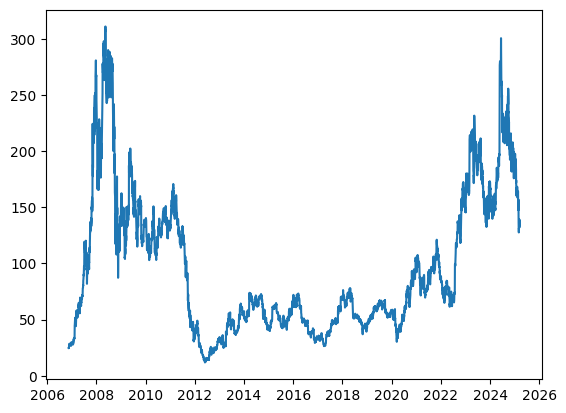

In [32]:
plt.plot(df['Close'])

 In Facebook's Prophet forecasting library, the DataFrame you pass to the model must have two columns: "ds" and "y". The "ds" (datestamp) column should contain the dates, typically in 'YYYY-MM-DD' format for daily data or datetime format for sub-daily data. The "y" column must contain the numerical values we want to forecast or model.

So if you are working with a DataFrame that has a "Date" column and you want to use it with Prophet, you would need to rename it to "ds"

In [33]:
print(df.columns)

# Flatten the MultiIndex and convert it into regular columns
df.columns = df.columns.get_level_values(0)  # Get only the first level of the MultiIndex

# Ensure that the date column is in the DataFrame (if it's in the index, move it to a column)
df['Date'] = df.index

# Rename the columns for Prophet: 'Date' to 'ds' and 'Close' (or whichever column you need) to 'y'
df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")

# Check the final structure of the DataFrame
df.head()

MultiIndex([('Close', 'FSLR')],
           names=['Price', 'Ticker'])


Price,y,ds
Date,,
2006-11-17,24.740000,2006-11-17
2006-11-20,25.000000,2006-11-20
2006-11-21,24.600000,2006-11-21
2006-11-22,26.879999,2006-11-22
2006-11-24,27.750000,2006-11-24


In [35]:
df.tail()

Price,y,ds,Date
Date,,,
2025-03-10,133.110001,2025-03-10,2025-03-10
2025-03-11,139.100006,2025-03-11,2025-03-11
2025-03-12,136.039993,2025-03-12,2025-03-12
2025-03-13,132.809998,2025-03-13,2025-03-13
2025-03-14,132.509995,2025-03-14,2025-03-14


# Make Stock Predictions using Facebook's Prophet

In [36]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj4_2qm5h/3igrldq_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj4_2qm5h/z3z0emv1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45744', 'data', 'file=/tmp/tmpj4_2qm5h/3igrldq_.json', 'init=/tmp/tmpj4_2qm5h/z3z0emv1.json', 'output', 'file=/tmp/tmpj4_2qm5h/prophet_modelf2z5eblm/prophet_model-20250317023123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:31:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:31:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds        yhat  yhat_lower  yhat_upper
4754 2025-08-08  239.636393  210.806252  273.023414
4755 2025-08-09  255.837722  223.047729  286.257574
4756 2025-08-10  255.841026  225.290826  286.257305
4757 2025-08-11  239.560844  207.123788  270.393741
4758 2025-08-12  239.378926  209.837368  271.134284


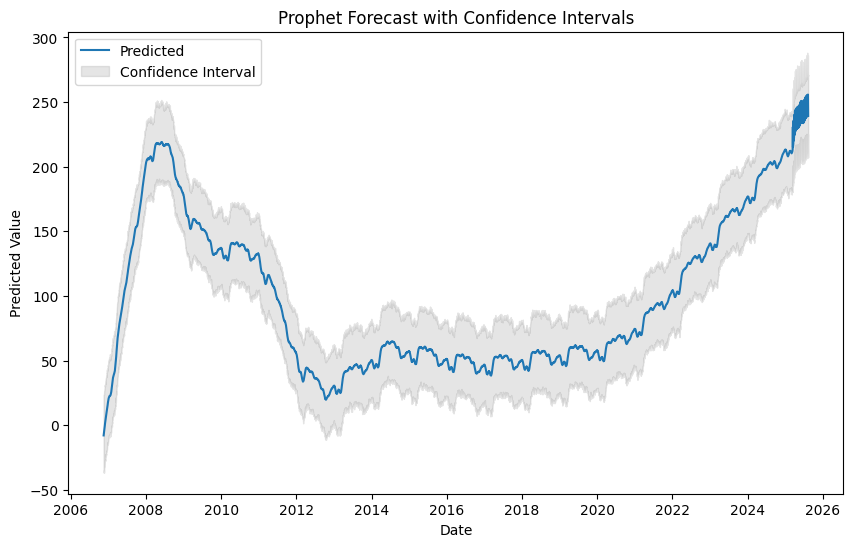

In [38]:
# Generate future dates
future = model.make_future_dataframe(periods=151)

# Predict future values
forecast = model.predict(future)

# Display the last 5 rows of predictions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Visualize the predictions
from prophet.plot import plot_plotly
import matplotlib.pyplot as plt

# Plot with Prophet's built-in plotting function
plot_plotly(model, forecast)

# Custom Matplotlib Plot (if needed)
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Confidence Interval')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('Prophet Forecast with Confidence Intervals')
plt.show()


In [18]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)
#use "all" tab. Variations in 1 week, 1 month etc is infinitesimally small

In [40]:
plot_components_plotly(model, forecast)


/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



# Deploy on Gradio

In [48]:
!pip install gradio

In [49]:
print(df.head())

Price               y         ds       Date
Date                                       
2006-11-17  24.740000 2006-11-17 2006-11-17
2006-11-20  25.000000 2006-11-20 2006-11-20
2006-11-21  24.600000 2006-11-21 2006-11-21
2006-11-22  26.879999 2006-11-22 2006-11-22
2006-11-24  27.750000 2006-11-24 2006-11-24


In [50]:
import gradio as gr
from datetime import datetime, timedelta
import pandas as pd
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly

def predict_stock(stock_ticker, start_date, end_date, periods):
    try:
        # Validate inputs
        periods = int(periods)
        datetime.strptime(start_date, "%Y-%m-%d")
        datetime.strptime(end_date, "%Y-%m-%d")

        # Fetch stock data
        df = yf.download(stock_ticker, start=start_date, end=end_date, auto_adjust=True, actions='inline', progress=False)
        if df.empty:
            return "Error: No data found for the given stock ticker or date range."

        # Prepare data for Prophet
        df = df[['Close']].reset_index()
        df.rename(columns={"Date": "ds", "Close": "y"}, inplace=True)

        # Train the model
        model = Prophet(daily_seasonality=True)
        model.fit(df)

        # Make predictions
        future = model.make_future_dataframe(periods=periods)
        forecast = model.predict(future)

        # Generate and return plot
        fig = plot_plotly(model, forecast)
        return fig

    except Exception as e:
        return f"Error: {str(e)}"

# Gradio interface
with gr.Blocks() as demo:
    gr.Markdown("# Stock Price Prediction App")
    gr.Markdown("Enter stock ticker, date range, and days to predict future prices.")

    stock_ticker = gr.Textbox(label="Stock Ticker Symbol", placeholder="e.g., AAPL")
    start_date = gr.Textbox(label="Start Date (YYYY-MM-DD)", value=(datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d'))
    end_date = gr.Textbox(label="End Date (YYYY-MM-DD)", value=datetime.now().strftime('%Y-%m-%d'))
    periods = gr.Number(label="Number of Days to Predict", value=30)

    outputs = gr.Plot()

    submit_button = gr.Button("Predict")
    submit_button.click(predict_stock, inputs=[stock_ticker, start_date, end_date, periods], outputs=outputs)

demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4413aafb3f9575ae30.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Deploy on Huggingface Spaces - Public Deployment

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)

In [ ]:
!gradio deploy


Need 'write' access token to create a Spaces repo.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Aborted.


#Interview Readiness Questions
1. Choose a new Ticker Symbol.  What is your ticker symbol? **FSLR**
With Actual ended at Mar 14 with 132.51
2. What were the future price predictions: Averaging fro $215 - $255
3. What were the initial price predictions: Initial predictions were:

Mar 15 230.1298

Mar 16 230.7461

Mar 17 215.1295


# References
[HuggingFace](www.huggingface.co)

[Gradio](https://www.gradio.app/guides/quickstart)


1, https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

2. https://colab.research.google.com/drive/1bb9LykqXq3FV8snTlWrPTHzB3amP9YFH?usp=sharing#scrollTo=iXzl-4Fz-hPV

3. [Sample Streamlit Deployment - Prophet](https://prophet.streamlit.app/?ref=streamlit-io-gallery-favorites)
